# Neural & Behavioral Modeling - Week 1 (Exercises)
by 劉昱維(r08227111@ntu.edu.tw)

In [17]:
%config IPCompleter.greedy=True 
%matplotlib inline
from numpy import *
from matplotlib.pyplot import *
from IPython.display import *
import sympy as sym

## 1 Party Simulation (5 points)
This is a model of a cocktail party. The men and women at the party form groups. A party-goer becomes uncomfortable and switches groups if their current group has too many members of the opposite sex.

### 1.1 Insert your codes to complete the simulation (2 points)

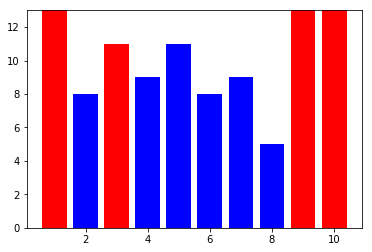

In [18]:
# Model parameters:
Ngroups=10
Npeople=100 
Tolerance=.5 # tolerable propotion of the opposite sex

# Supporting functions:
class Person:
    def __init__(self, Ngroups):
        self.sex = random.randint(2) # 0=woman; 1=man
        self.Ngroups=Ngroups
        self.group = random.randint(Ngroups) # staying in which group?
        
    def leave(self):
        options=delete(arange(self.Ngroups),self.group) # except the current group
        self.group = int(random.choice(options,1)) # choosing a new group
    
def party_stats(people): # calculate the number of men & women in each group
    Npeople=len(people)    
    sexes=[people[i].sex for i in range(Npeople)]
    groups=[people[i].group for i in range(Npeople)]
    #counts=zeros((max(groups)+1,max(sexes)+1))
    counts=zeros((Ngroups,2))
    proportions=counts.copy()
    for p in range(Npeople):
        counts[groups[p],sexes[p]]+=1
    men_plus_women=sum(counts,1) # number of men and women in each group
    men_plus_women[men_plus_women==0]=inf # to avoid "dividing by zeros later
    proportions[:,0]=counts[:,0]/men_plus_women # proportion of women in each group
    proportions[:,1]=counts[:,1]/men_plus_women # proportion of men in each group
    return counts, proportions # size=group*sex

def plot_party(counts):
    x=arange(len(counts))+1 # number of groups
    clf() # clear previous figure
    bar(x, counts[:,0], color = 'r') # women
    bar(x, counts[:,1], color = 'b', bottom = counts[:,0]) # men on top of women in the plot
    display(gcf()); clear_output(wait=True) # to allow dynamic plots
    
# Initialization:
people = [Person(Ngroups) for i in range(Npeople)] # assign each person to a group
Nhappy=0 # Number of happy people
counts, proportions=party_stats(people)
# Simulation:
while(Nhappy<Npeople): # Simulation stops when everyone is happy
    Nhappy=0 # recounting after a new move
    
    # Insert your codes here to make everyone happy:
    for _p in people:
        if (1 - proportions[_p.group, _p.sex]) > Tolerance: # 若是異性的比例 >容忍度，離開房間
            _p.leave()
        else:                                               # 若否，則留在房間。快樂人+1
            Nhappy += 1
    # Plot new results:
    counts, proportions=party_stats(people) # size=group*sex
    plot_party(counts)

### [補] 1.1 Program BUG
Line 21: counts = zeros((max(groups)+1,max(sexes)+1))
<br>Line 21': counts = zeros((Ngroups,2))</br>
<br>主要用來產生 [房間數\*性別]的矩陣，若是上方亂數產生的性別全為女生(sexes=0),counts將會變成[房間數\*1]的矩陣，房間數同理，所以應修改成有幾間房，有多少種性別，就填多少。</br>


### 1.2 Modify the three model parameters & discuss how each affects your simulations (2 points)

[結論] Ngroup越大，Npeople越小，Tolerance越大越容易收斂。
1. Tolerance是較為關鍵的收斂要素，當Tolerance小於0.5時，代表當性別比不是1:1時就會有人不滿意而離開房間，因此不易達到收斂；當放寬Tolerance時，則越快達到收斂。
2. Ngroup 和 Npeoplee共同影響性別比，若是性別比變化大，則能越快可能達到收斂。


### 1.3 Discuss why the simulaiton leads to group polarization (1 point)

若Tolerance < 0.5表示哪怕房間內男女人數相當，也必定有一方不滿意，便會往單一房間僅有單一性別的方向發展。

## 2 Understand Shunting Equation (5 points)

$\frac{dy}{dt}=-Ay+(B-y)*E-(y-C)*I$

### 2.1 Find its equilibrium by analytically solving $dy/dt=0$ (1 point)

$$ 
\begin{align*}  
& 0 = \frac{dy}{dt} = -Ay+(B-y) \times E-(y-C) \times I \\
\Rightarrow \quad & y= \frac{E \times B + I \times C}{A+E+I} 
\end{align*} 
$$

### 2.2 Use Euler integration to verify your answer in 2.1 with your own (A, B, C, E, I) constants (2 points)


In [19]:
# Write your simulation codes here

t,A,B,C,E,I = sym.symbols('t,A,B,C,E,I')
y = sym.Function('y')(t)
sol = sym.dsolve(y.diff()+A*y-(B-y)*E+(y-C)*I) # solving dy/dt = 0

print("Verified: {0}".format(sol))


Verified: Eq(y(t), (B*E + C*I + exp((C1 - t)*(A + E + I)))/(A + E + I))


### 2.3 Combining math & if-then controls in numerical integrations (2 points)

Use Euler integration to plot $dy/dt=-y(t)+E$ where
$E=\begin{cases}
    1  &  \text{if } t<5\\
    0  &  \text{if } t>5
   \end{cases}$
for t=[0,10] & y(t=0)=0.

This is an example of time-varying rather than constant excitation.

Eq(y(t), C1*exp(-t))
Eq(y(t), C1*exp(-t) + 1)


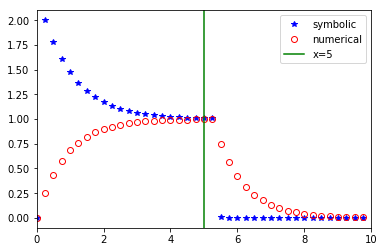

In [21]:
# Write your simulation codes here

# Solving Equation
t = sym.symbols('t')
y = sym.Function('y')(t)
gt_y = sym.dsolve(y.diff()+y)   #solving dy/dt = 0, when t > 5
ls_y = sym.dsolve(y.diff()+y-1) #solving dy/dt = 0, when t < 5
print(gt_y)
print(ls_y)

# Simulation
dt = .25               # Step Range
y = [0]                # approximation Y
_y = [0]               # True Y
t = arange(0,10,dt)    # t=[0,10]
for _t in t:
    y1 = y[-1]         # the last element
    if _t > 5:
        E = 0
        _y.append(exp(-_t))
    else:
        E = 1
        _y.append(exp(-_t)+1)
    y2 = y1 + dt*(-y1 + E)
    y.append(y2)

# Plot
xlim(0,10)
plot(t, _y[0:-1], 'b*')                        # true y
plot(t, y[0:-1], 'ro', markerfacecolor='None') # approximation
axvline(5,c='g')
legend(['symbolic', 'numerical', 'x={}'.format(5)]);
show()